In [5]:
import torch
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import os.path as osp
import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from torch_geometric.datasets import TUDataset
from torch_geometric.data import DataLoader
from torch_geometric.nn import GraphConv, TopKPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# dataset
path = '../data/ENZYMES/'
dataset = TUDataset(path, name='ENZYMES')
dataset = dataset.shuffle()
n = len(dataset) // 10

Extracting ../data/ENZYMES/ENZYMES.zip
Processing...
Done!


In [12]:
test_dataset = dataset[:n]
train_dataset = dataset[n:]
test_loader = DataLoader(test_dataset, batch_size=60)
train_loader = DataLoader(train_dataset, batch_size=60)

In [31]:
data = train_loader.__iter__().__next__()
x, edge_index, batch, y = data.x, data.edge_index, data.batch, data.y

In [32]:
y.size()

torch.Size([60])

In [30]:
x.size()

torch.Size([1920, 3])

In [21]:
edge_index.size()

torch.Size([2, 7488])

In [23]:
batch.size()

torch.Size([1920])

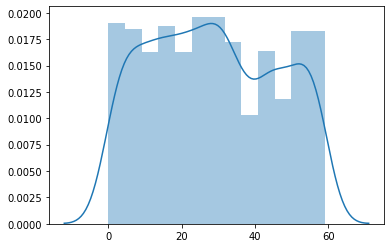

In [25]:
sns.distplot(batch.numpy().ravel())